In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
zip_file = tf.keras.utils.get_file(origin=_URL,fname="flower_photos.tgz",extract=True)

228813984/228813984 [==============================] - 8s 0us/step


In [ ]:
zip_file

'/root/.keras/datasets/flower_photos.tgz'

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [ ]:
base_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
os.listdir('/root/.keras/datasets/flower_photos')

['dandelion', 'daisy', 'LICENSE.txt', 'roses', 'tulips', 'sunflowers']

In [ ]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [ ]:
classes

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [ ]:
for cl in classes:
    img_path = os.path.join(base_dir,cl)
    images = glob.glob(img_path+'/*.jpg')
    print("{}:{} Images".format(cl,len(images)))
    num_train = int(round(len(images)*0.8))
    train,val = images[:num_train],images[num_train:]
    for t in train:
        if not os.path.exists(os.path.join(base_dir,'train',cl)):
            os.makedirs(os.path.join(base_dir,'train',cl))
        shutil.move(t,os.path.join(base_dir,'train',cl))
    for v in val:
        if not os.path.exists(os.path.join(base_dir,'val',cl)):
            os.makedirs(os.path.join(base_dir,'val',cl))
        shutil.move(v,os.path.join(base_dir,'val',cl))

roses:641 Images
daisy:633 Images
dandelion:898 Images
sunflowers:699 Images
tulips:799 Images


In [ ]:
round(len(images)*0.8)

639

In [ ]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [ ]:
train_dir

'/root/.keras/datasets/flower_photos/train'

In [ ]:
val_dir

'/root/.keras/datasets/flower_photos/val'

In [ ]:
batch_size = 10
IMG_SHAPE = 150

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE,IMG_SHAPE)
                                              )

Found 2935 images belonging to 5 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img ,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

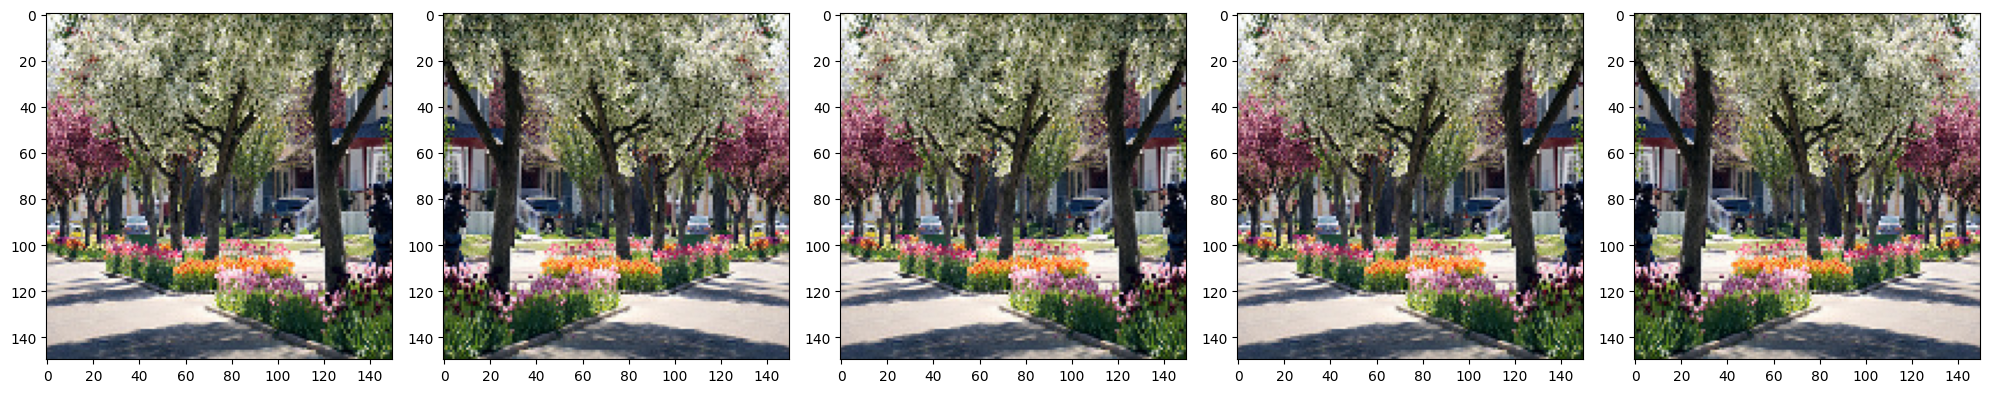

In [ ]:
plotImages(augmented_images)

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


In [ ]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
model = Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs = 80
history = model.fit(train_data_gen,
                   steps_per_epoch=int(np.ceil(train_data_gen.n/float(batch_size))),
                    epochs=epochs,
                   validation_data=val_data_gen,
                   validation_steps=int(np.ceil(val_data_gen.n/float(batch_size))))

Epoch 1/80
294/294 [==============================] - 153s 515ms/step - loss: 1.2931 - accuracy: 0.4433 - val_loss: 1.0211 - val_accuracy: 0.6014
Epoch 2/80
294/294 [==============================] - 150s 509ms/step - loss: 1.0598 - accuracy: 0.5789 - val_loss: 1.0683 - val_accuracy: 0.5633
Epoch 3/80
294/294 [==============================] - 157s 533ms/step - loss: 0.9526 - accuracy: 0.6283 - val_loss: 0.8143 - val_accuracy: 0.6912
Epoch 4/80
294/294 [==============================] - 153s 521ms/step - loss: 0.8678 - accuracy: 0.6579 - val_loss: 0.8240 - val_accuracy: 0.6925
Epoch 5/80
294/294 [==============================] - 155s 529ms/step - loss: 0.8590 - accuracy: 0.6634 - val_loss: 0.8238 - val_accuracy: 0.7129
Epoch 6/80
294/294 [==============================] - 154s 523ms/step - loss: 0.8139 - accuracy: 0.6804 - val_loss: 0.7993 - val_accuracy: 0.6816
Epoch 7/80
294/294 [==============================] - 157s 532ms/step - loss: 0.8028 - accuracy: 0.6995 - val_loss: 0.7384 -

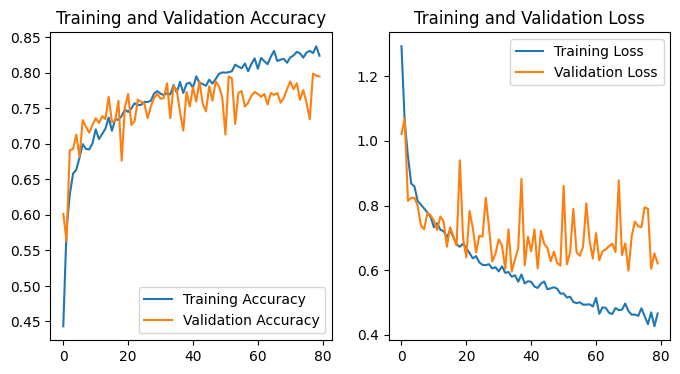

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()